# Import Libraries :

In [2]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
import streamlit as st

# download and Read data:

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]


# Set the path to the file you'd like to load
file_path = "Car_Data.csv"

# Load the latest version
cars = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zain280/car-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



/tmp/ipython-input-4-2811532882.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  cars = kagglehub.load_dataset(


100%|██████████| 1.33M/1.33M [00:00<00:00, 109MB/s]

Extracting zip of Car_Data.csv...


In [5]:
cars.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


# Data Preprocessing:

1. General informations about the data :

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      100000 non-null  object
 2   Model      100000 non-null  object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


2. Ensure that there are no duplicate values :

In [8]:
print(cars.duplicated().sum())

0


3. Ensure that there are no hidden missng values :

In [9]:
for i in cars.columns:
  if cars[i].dtype == 'object':
    print(f'Column : {i}')
    print(cars[i].unique())
    print('-'*40)

Column : Brand
['Mazda' 'Jaguar' 'Land Rover' 'Porsche' 'Volvo' 'Chevrolet' 'Ford'
 'Hyundai' 'Tesla' 'Lexus' 'Mercedes-Benz' 'Subaru' 'Volkswagen' 'Audi'
 'Honda' 'Jeep' 'BMW' 'Nissan' 'Kia' 'Toyota']
----------------------------------------
Column : Model
['Generic Model 3' 'Generic Model 2' 'Focus' 'Generic Model 1' 'Odyssey'
 'Civic' 'Pilot' 'Tacoma' 'RAV4' 'F-150' 'Corolla' 'Prius' 'Escape'
 'Highlander' 'Edge' 'Accord' 'Fit' 'Mustang' 'Camry' 'Explorer' 'CR-V']
----------------------------------------
Column : Color
['Blue' 'Silver' 'Green' 'Black' 'Red' 'White']
----------------------------------------
Column : Condition
['New' 'Used']
----------------------------------------


4. set ID column as index :

In [10]:
cars.set_index('ID' , inplace=True)

In [11]:
cars.head()

,Brand,Model,Year,Color,Mileage,Price,Condition
ID,,,,,,,
1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


5. Check outliers in Price column:

In [45]:
Q1 = cars['Price'].quantile(0.25)
Q3 = cars['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f'Lower limit = {lower_limit}')
print(f'Upper limit = {upper_limit}')

Lower limit = -32229.375
Upper limit = 117253.625


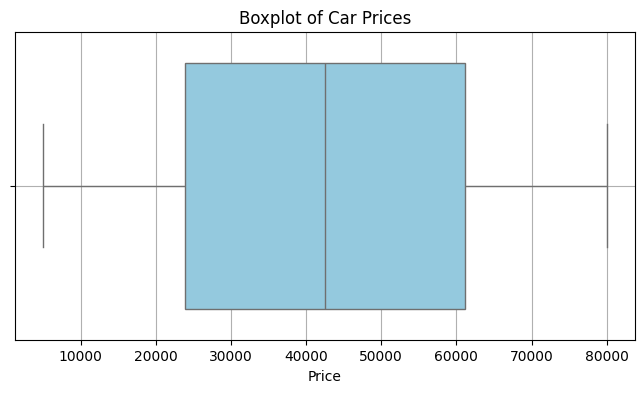

In [46]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars['Price'], color='skyblue')
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()


6. Check outliers in Mileage column:

In [47]:
Q1 = cars['Mileage'].quantile(0.25)
Q3 = cars['Mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f'Lower limit = {lower_limit}')
print(f'Upper limit = {upper_limit}')

Lower limit = -99771.25
Upper limit = 299608.75


In [48]:
len(cars[cars.Mileage > upper_limit])

0

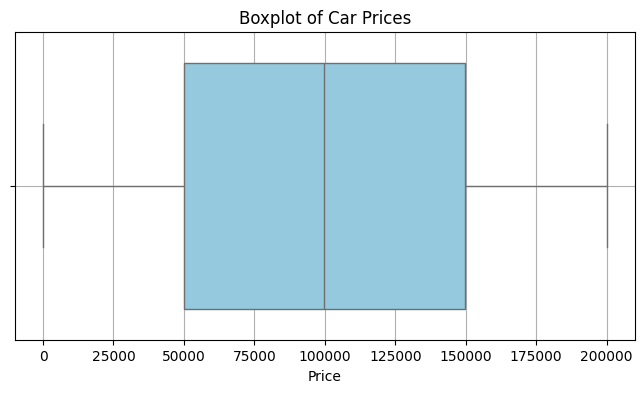

In [49]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=cars['Mileage'], color='skyblue')
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()


# Analysis :

1. Total Cars :

In [12]:
len(cars)

100000

2. Total Revenue

In [15]:
print("Total Revenue", f"${cars['Price'].sum():,.0f}")

Total Revenue $4,253,451,937


3. Average price :

In [16]:
print("Average Price", f"${cars['Price'].mean():,.2f}")

Average Price $42,534.52


4. Number of unique Brands :

In [17]:
num_brands = cars['Brand'].nunique()
print('Number of Unique Brands : ' , num_brands)

Number of Unique Brands :  20


5. Brands name :

In [23]:
brands_name = cars['Brand'].unique()
print('Name of The Brands : ')
for i in brands_name:
  print(i)

Name of The Brands : 
Mazda
Jaguar
Land Rover
Porsche
Volvo
Chevrolet
Ford
Hyundai
Tesla
Lexus
Mercedes-Benz
Subaru
Volkswagen
Audi
Honda
Jeep
BMW
Nissan
Kia
Toyota


6. General KPI's for each Brand :

In [25]:
for i in brands_name:
  print(f'{i} Brand :')

  brand_data = cars[cars['Brand'] == i]

  total_cars_sold = brand_data.shape[0]
  total_revenue = brand_data['Price'].sum()
  average_revenue = brand_data['Price'].mean()
  number_of_models = brand_data['Model'].nunique()

  print(f'Total Cars Sold        : {total_cars_sold}')
  print(f'Total Revenue          : ${total_revenue:,.2f}')
  print(f'Average Revenue        : ${average_revenue:,.2f}')
  print(f'Number of Models       : {number_of_models}')
  print('-'*50)

Mazda Brand :
Total Cars Sold        : 4900
Total Revenue          : $209,444,669.00
Average Revenue        : $42,743.81
Number of Models       : 3
--------------------------------------------------
Jaguar Brand :
Total Cars Sold        : 4933
Total Revenue          : $210,112,465.00
Average Revenue        : $42,593.24
Number of Models       : 3
--------------------------------------------------
Land Rover Brand :
Total Cars Sold        : 4919
Total Revenue          : $210,715,189.00
Average Revenue        : $42,837.00
Number of Models       : 3
--------------------------------------------------
Porsche Brand :
Total Cars Sold        : 5026
Total Revenue          : $214,766,180.00
Average Revenue        : $42,731.03
Number of Models       : 3
--------------------------------------------------
Volvo Brand :
Total Cars Sold        : 5087
Total Revenue          : $215,026,295.00
Average Revenue        : $42,269.77
Number of Models       : 3
------------------------------------------------

7. Genral KPI's in each model below specific Brand :

In [26]:
brands_name = cars['Brand'].unique()

for brand in brands_name:
    print(f'Brand: {brand}')
    print('-' * 60)

    brand_data = cars[cars['Brand'] == brand]
    models = brand_data['Model'].unique()

    for model in models:
        model_data = brand_data[brand_data['Model'] == model]

        total_cars = model_data.shape[0]
        total_revenue = model_data['Price'].sum()
        average_revenue = model_data['Price'].mean()

        print(f'Model: {model}')
        print(f'Total Cars Sold   : {total_cars}')
        print(f'Total Revenue     : ${total_revenue:,.2f}')
        print(f'Average Revenue   : ${average_revenue:,.2f}')
        print('-' * 40)

    print('\n')


Brand: Mazda
------------------------------------------------------------
Model: Generic Model 3
Total Cars Sold   : 1671
Total Revenue     : $72,724,270.00
Average Revenue   : $43,521.41
----------------------------------------
Model: Generic Model 1
Total Cars Sold   : 1575
Total Revenue     : $65,908,597.00
Average Revenue   : $41,846.73
----------------------------------------
Model: Generic Model 2
Total Cars Sold   : 1654
Total Revenue     : $70,811,802.00
Average Revenue   : $42,812.46
----------------------------------------


Brand: Jaguar
------------------------------------------------------------
Model: Generic Model 2
Total Cars Sold   : 1643
Total Revenue     : $71,231,437.00
Average Revenue   : $43,354.50
----------------------------------------
Model: Generic Model 1
Total Cars Sold   : 1644
Total Revenue     : $70,772,339.00
Average Revenue   : $43,048.87
----------------------------------------
Model: Generic Model 3
Total Cars Sold   : 1646
Total Revenue     : $68,10

8. Number of cars sold each year their average revenue and their total revenue :

In [36]:
number_of_cars_in_year = cars.groupby('Year').agg(
    Number_of_sold_cars=('Price', 'count'),
    Average_Revenue=('Price', 'mean'),
    Total_Revenue=('Price', 'sum')
).reset_index()
number_of_cars_in_year

,Year,Number_of_sold_cars,Average_Revenue,Total_Revenue
0,1990,3006,42150.378244,126704037
1,1991,2988,42201.822289,126099045
2,1992,3048,41800.389764,127407588
3,1993,2975,42143.536471,125377021
4,1994,3090,42550.658252,131481534
5,1995,3013,42392.069366,127727305
6,1996,2993,42399.275643,126901032
7,1997,3002,42553.418721,127745363
8,1998,3112,42735.466902,132992773
9,1999,3071,42927.862585,131831466


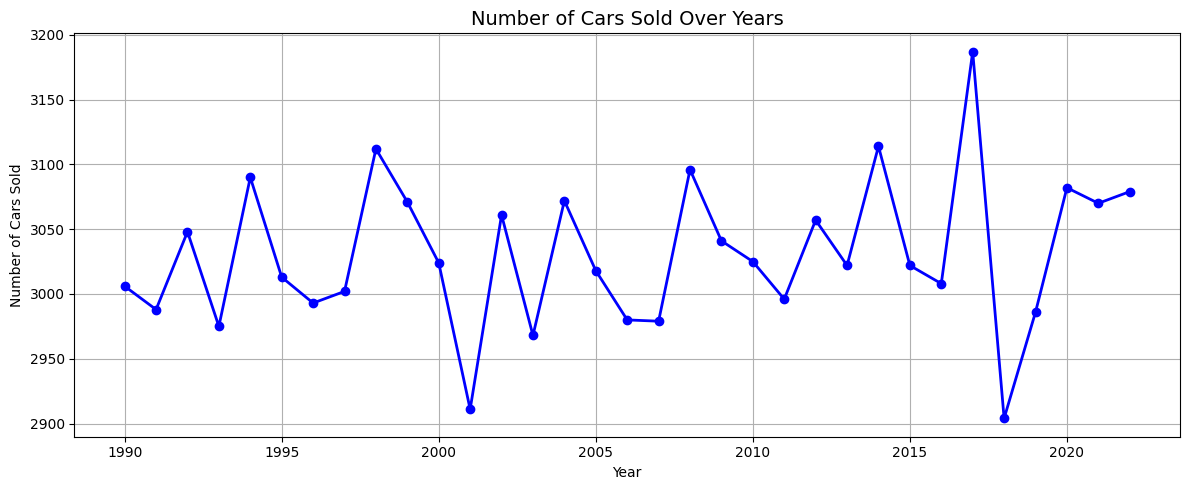

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(number_of_cars_in_year['Year'], number_of_cars_in_year['Number_of_sold_cars'],
         marker='o', color='blue', linewidth=2)
plt.title("Number of Cars Sold Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

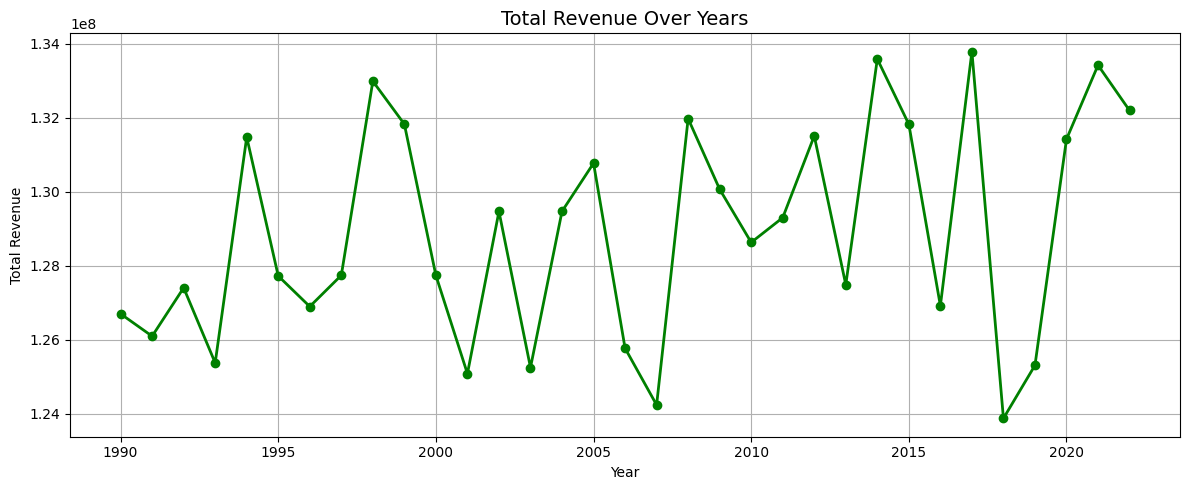

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(number_of_cars_in_year['Year'], number_of_cars_in_year['Total_Revenue'],
         marker='o', color='green', linewidth=2)
plt.title("Total Revenue Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

9. Filtered Sales by Year, Color, and Condition

In [51]:
number_of_cars_in_year = cars.groupby(['Year' , 'Color' ,  'Condition']).agg(
    Number_of_sold_cars=('Price', 'count'),
    Average_Revenue=('Price', 'mean'),
    Total_Revenue=('Price', 'sum')
).reset_index()
number_of_cars_in_year

,Year,Color,Condition,Number_of_sold_cars,Average_Revenue,Total_Revenue
0,1990,Black,New,253,41533.339921,10507935
1,1990,Black,Used,238,42609.659664,10141099
2,1990,Blue,New,269,41880.936803,11265972
3,1990,Blue,Used,219,43658.447489,9561200
4,1990,Green,New,247,40863.846154,10093370
...,...,...,...,...,...,...
391,2022,Red,Used,264,42368.143939,11185190
392,2022,Silver,New,247,43496.724696,10743691
393,2022,Silver,Used,257,42842.284047,11010467
394,2022,White,New,270,42449.396296,11461337


In [55]:
number_of_cars_in_year_Brand_Model_COLOR_CONDITION = cars.groupby(['Year' ,'Brand' ,'Model' , 'Color' ,  'Condition']).agg(
    Number_of_sold_cars=('Price', 'count'),
    Average_Revenue=('Price', 'mean'),
    Total_Revenue=('Price', 'sum')
).reset_index()
number_of_cars_in_year_Brand_Model_COLOR_CONDITION

,Year,Brand,Model,Color,Condition,Number_of_sold_cars,Average_Revenue,Total_Revenue
0,1990,Audi,Generic Model 1,Black,New,6,50072.000000,300432
1,1990,Audi,Generic Model 1,Black,Used,4,45520.000000,182080
2,1990,Audi,Generic Model 1,Blue,New,2,68771.000000,137542
3,1990,Audi,Generic Model 1,Blue,Used,4,36839.000000,147356
4,1990,Audi,Generic Model 1,Green,New,3,49273.333333,147820
...,...,...,...,...,...,...,...,...
26216,2022,Volvo,Generic Model 3,Red,Used,5,35575.200000,177876
26217,2022,Volvo,Generic Model 3,Silver,New,5,53726.000000,268630
26218,2022,Volvo,Generic Model 3,Silver,Used,5,56761.600000,283808
26219,2022,Volvo,Generic Model 3,White,New,4,41590.750000,166363


10. Used cars number of sold cars , Average Revenue and total revenue according to each year and car color

In [58]:
used_cars = cars[cars['Condition'] == 'Used']
used_cars_each_year = used_cars.groupby(['Year' , 'Color']).agg(Number_of_sold_cars=('Price', 'count'),
    Average_Revenue=('Price', 'mean'),
    Total_Revenue=('Price', 'sum'))
used_cars_each_year

Number_of_sold_cars  Average_Revenue  Total_Revenue
Year Color                                                      
1990 Black                   238     42609.659664       10141099
     Blue                    219     43658.447489        9561200
     Green                   257     41304.050584       10615141
     Red                     259     44561.247104       11541363
     Silver                  250     41689.660000       10422415
...                          ...              ...            ...
2022 Blue                    277     41672.913357       11543397
     Green                   261     44721.770115       11672382
     Red                     264     42368.143939       11185190
     Silver                  257     42842.284047       11010467
     White                   249     42774.710843       10650903

[198 rows x 3 columns]

11. New cars number of sold cars , Average Revenue and total revenue according to each year and car color

In [59]:
used_cars = cars[cars['Condition'] == 'New']
used_cars_each_year = used_cars.groupby(['Year' , 'Color']).agg(Number_of_sold_cars=('Price', 'count'),
    Average_Revenue=('Price', 'mean'),
    Total_Revenue=('Price', 'sum'))
used_cars_each_year

Number_of_sold_cars  Average_Revenue  Total_Revenue
Year Color                                                      
1990 Black                   253     41533.339921       10507935
     Blue                    269     41880.936803       11265972
     Green                   247     40863.846154       10093370
     Red                     255     42778.588235       10908540
     Silver                  236     41273.682203        9740589
...                          ...              ...            ...
2022 Blue                    254     41561.874016       10556716
     Green                   255     43359.200000       11056596
     Red                     246     43355.390244       10665426
     Silver                  247     43496.724696       10743691
     White                   270     42449.396296       11461337

[198 rows x 3 columns]

12. Top 5 Brands by Total Revenue :

In [61]:
top_5_brands = cars.groupby('Brand')['Price'].sum().sort_values(ascending = False).head(5)
top_5_brands

,Price
Brand,
Lexus,218105017
Ford,215654615
Toyota,215629068
Tesla,215612945
Volvo,215026295


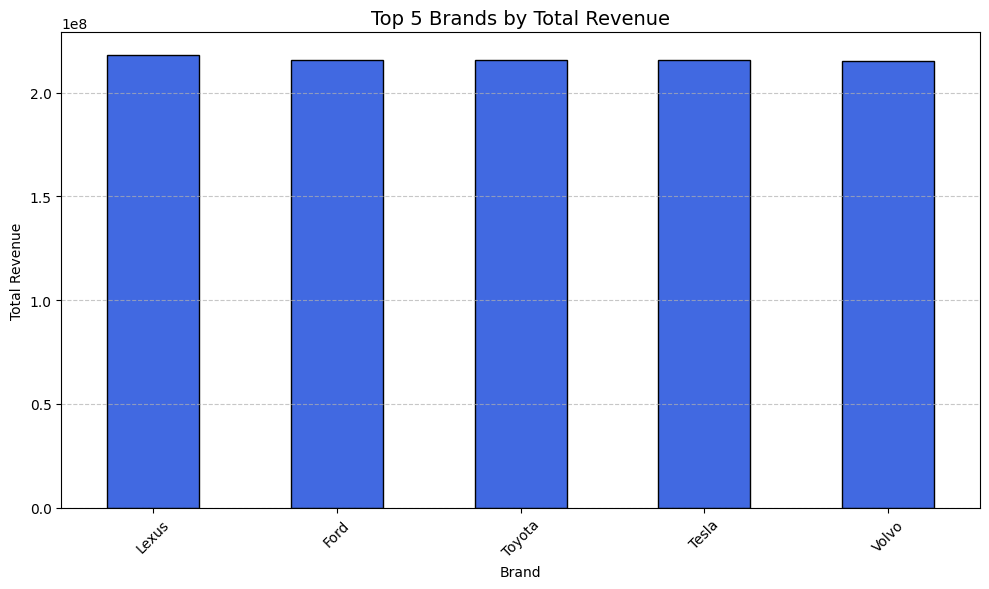

In [62]:
plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar', color='royalblue', edgecolor='black')

plt.title('Top 5 Brands by Total Revenue', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

13. Average Price per Condition (New vs Used)

In [64]:
Average_price_perCondition = cars.groupby('Condition')['Price'].mean()
Average_price_perCondition

,Price
Condition,
New,42540.140553
Used,42528.905602


14 . Aerage Car Age :

In [66]:
current_year = 2025
cars['Cars_Age'] = current_year - cars['Year']
cars['Cars_Age']

,Cars_Age
ID,
1,22
2,22
3,3
4,28
5,25
...,...
99996,7
99997,10
99998,16


In [70]:
average_cars_Age = cars['Cars_Age'].mean()
print(average_cars_Age)

18.96591


15. Most Popular Color per Year

In [80]:
most_popular_color_per_year = cars.groupby('Year')['Color'] \
                                  .agg(lambda x: x.value_counts().idxmax()) \
                                  .reset_index(name='Most_Popular_Color')

most_popular_color_per_year


,Year,Most_Popular_Color
0,1990,White
1,1991,Silver
2,1992,Green
3,1993,Red
4,1994,White
5,1995,Green
6,1996,Black
7,1997,Green
8,1998,White
9,1999,Red


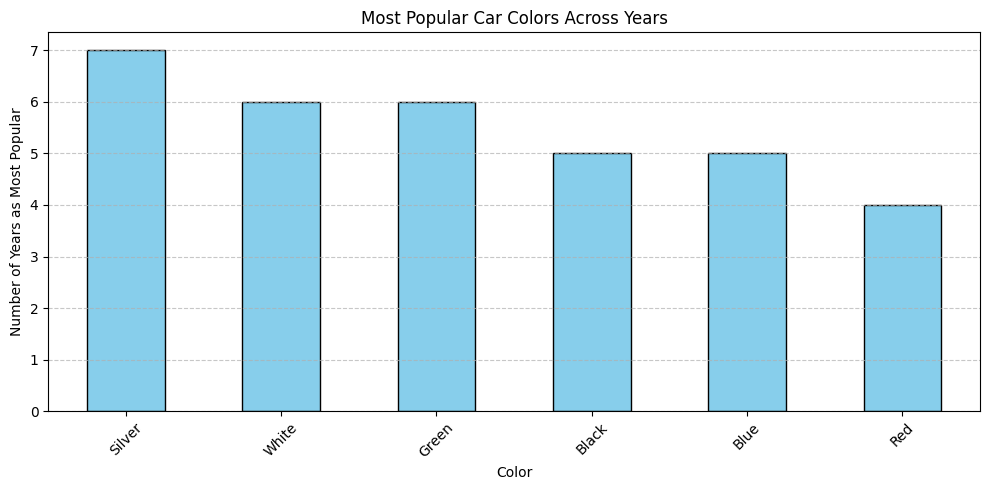

In [81]:
color_counts = most_popular_color_per_year['Most_Popular_Color'].value_counts()

plt.figure(figsize=(10, 5))
color_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Most Popular Car Colors Across Years')
plt.xlabel('Color')
plt.ylabel('Number of Years as Most Popular')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

16. Price per Mile Ratio

In [85]:
cars['Price_per_mile_Ratio'] = cars['Price']/cars['Mileage']
cars['Price_per_mile_Ratio']

,Price_per_mile_Ratio
ID,
1,2.866388
2,0.651790
3,1.381199
4,0.427909
5,0.346016
...,...
99996,1.321544
99997,2.610010
99998,1.079597


In [98]:
cars['Price_per_mile_Ratio'].mean()

np.float64(3.148420296608754)

17 . Best Selling Model per Brand

In [100]:
best_sell = (
    cars.groupby(['Brand', 'Model'])
    .size()
    .reset_index(name='Sales')
    .sort_values(['Brand', 'Sales'], ascending=[True, False])
    .groupby('Brand')
    .first()
    .reset_index()
)
best_sell

,Brand,Model,Sales
0,Audi,Generic Model 2,1695
1,BMW,Generic Model 2,1680
2,Chevrolet,Generic Model 1,1728
3,Ford,F-150,893
4,Honda,CR-V,860
5,Hyundai,Generic Model 3,1688
6,Jaguar,Generic Model 3,1646
7,Jeep,Generic Model 1,1676
8,Kia,Generic Model 3,1652
9,Land Rover,Generic Model 2,1661


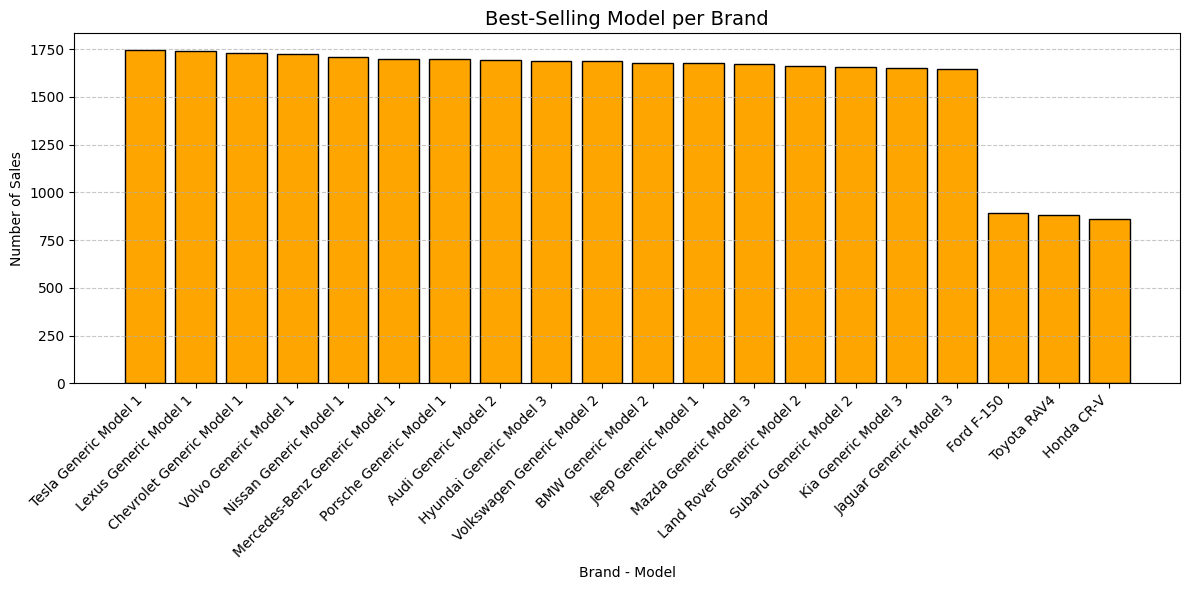

In [102]:
best_sell['Label'] = best_sell['Brand'] + " " + best_sell['Model']

best_sell = best_sell.sort_values('Sales', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(best_sell['Label'], best_sell['Sales'], color='orange', edgecolor='black')

plt.title('Best-Selling Model per Brand', fontsize=14)
plt.xlabel('Brand - Model')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
